In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv("C:\\Users\\sumit.DESKTOP-5DLLNM0\\Downloads\\mlproject\\StudentsPerformance.csv")

In [14]:
import os

file_path = r"C:\Users\sumit.DESKTOP-5DLLNM0\Downloads\mlproject\StudentsPerformance.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found. Please check the path.")

File found!


In [15]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df.shape

(1000, 8)

In [17]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [22]:
df.drop_duplicates(keep="first")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [25]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [26]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [30]:
df['gender'].unique()            

array(['female', 'male'], dtype=object)

In [34]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

In [35]:
numerical_features

['math score', 'reading score', 'writing score']

In [36]:
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [37]:
df['total_score']=df['math score']+df['reading score']+df['writing score']

In [38]:
df['avg_score']=df['total_score']/3

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [50]:
reading_full=df[df['reading score']==100]['avg_score'].count()
math_full=df[df['math score']==100]['avg_score'].count()
writing_full=df[df['writing score']==100]['avg_score'].count()

In [48]:
reading_full

17

In [51]:
reading_20=df[df['reading score']<=20]['avg_score'].count()
math_20=df[df['math score']<=20]['avg_score'].count()
writing_20=df[df['writing score']<=20]['avg_score'].count()

<Axes: xlabel='avg_score', ylabel='Count'>

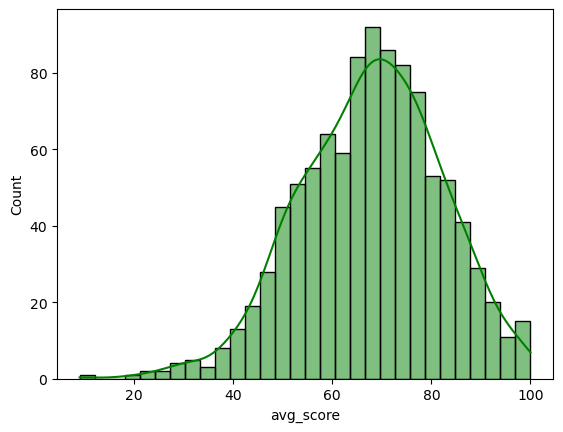

In [52]:
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')

<Axes: xlabel='avg_score', ylabel='Count'>

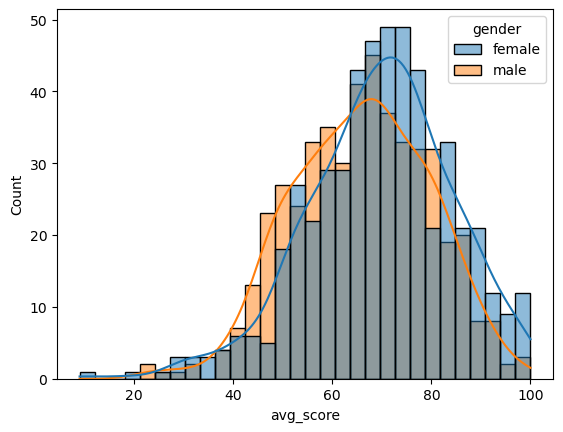

In [53]:
sns.histplot(data=df,x='avg_score',bins=30,kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

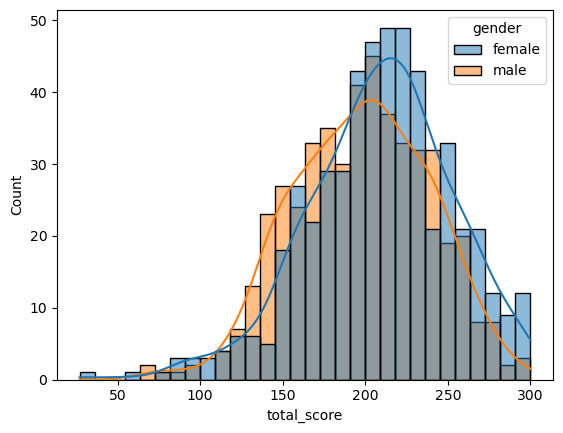

In [55]:
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

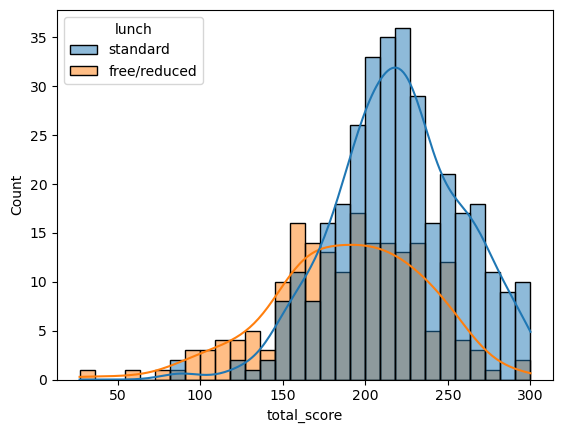

In [57]:
sns.histplot(data=df[df['gender']=='female'],x='total_score',bins=30,kde=True,hue='lunch')